<a href="https://colab.research.google.com/github/Rymendelous/projetadd/blob/main/projetadd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #pour accéder au drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Étape 0: Importation des bibliothèques et chargement des jeux de données 🎀**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path='/content/drive/MyDrive/projetadd/data/raw/covid.csv'
data_path_agemedian='/content/drive/MyDrive/projetadd/data/raw/agemedian.csv'
data_path_pop='/content/drive/MyDrive/projetadd/data/raw/densitepopulation/pop2022.csv'
data_path_education='/content/drive/MyDrive/projetadd/data/raw/education/education.csv'
data_path_revenu='/content/drive/MyDrive/projetadd/data/raw/revenumedian/revmedian.csv'
data = pd.read_csv(data_path, sep=";", nrows=50)


# **Étape 1 : Nettoyage et compréhension des jeux de données 🎀**

On commence dans un premier temps par nettoyer nos datasets un par un.

# **DATASET DENSITÉ DE POPULATION👩‍💻**

On ne garde que :

*   l'année **2022** car c'est la seule année qui est en commun sur tout nos jeux de données.
*   la population totale au lieu des sexes séparés

On transforme tout les numéros de départements en string au lieu de int pour ne pas avoir d'erreur



In [ ]:
#ON NETTOIE LE DATASET DE DENSITÉ DE POPULATION ET ON VISUALISE LA POPULATION PAR DÉPARTEMENTS AVEC DES HISTOGRAMMES
#pop = JEU DE DONNÉES DE DENSITÉ
data_dep = pd.read_csv(data_path_pop, sep=";", dtype={'GEO': str}, low_memory=False)

# on garde que les départements de la métropoles, on enlève ceux d'outre mer et de corse
# 01 à 95 uniquement
metropole = [str(i).zfill(2) for i in range(1, 96)] #str(i).zfill(2)  transforme les numéros de dép à 1 chiffre en numéro à deux chiffre par exemple pour l'ain 01 au lieu de 1
pop = data_dep[data_dep['GEO'].isin(metropole)]
pop = pop[pop['TIME_PERIOD'] == 2022]
pop = pop[pop['SEX'] == '_T']
pop = pop.reset_index(drop=True)



In [ ]:
pop['AGE'].unique()

array(['Y15T24', 'Y20T64', 'Y25T39', 'Y40T54', 'Y_GE80', 'Y55T64',
       'Y_GE65', '_T', 'Y65T79', 'Y_LT20', 'Y_LT15'], dtype=object)

In [ ]:
age_rename = {
    'Y_LT15': '<15',
    'Y_LT20': '<20',
    'Y15T24': '15-24',
    'Y20T64': '20-64',
    'Y25T39': '25-39',
    'Y40T54': '40-54',
    'Y55T64': '55-64',
    'Y65T79': '65-79',
    'Y_GE65': '65+',
    'Y_GE80': '80+',
    '_T': 'Total'
}

pop['AGE'] = pop['AGE'].map(age_rename) #on renomme les valeurs de la variables AGE car c'était pas clair les Y.. machin
pop = pop[['GEO', 'AGE', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'NB_PERSONNES','GEO':'DEP'}) #on renomme les noms des colonnes pour plus de clarté
pop.head(30)

,DEP,AGE,NB_PERSONNES
0,93,15-24,225145.217999
1,42,20-64,408691.081674
2,45,25-39,119253.561146
3,07,20-64,175359.148527
4,37,20-64,335190.569080
5,46,20-64,88981.646406
6,82,40-54,53252.100040
7,81,25-39,58420.441490
8,95,40-54,251935.510441
9,02,15-24,58684.585426


On visualise avec un histogramme ce qu'on a nettoyé du dataset densité de population pour voir si nos valeurs sont cohérentes.

Ici c'est le cas car la tranche d'âge majoritaire en France en 2022 est celle des **20-64 ans**.

Text(0.5, 1.0, "Répartition de la population par tranche d'âge en France(2022)")

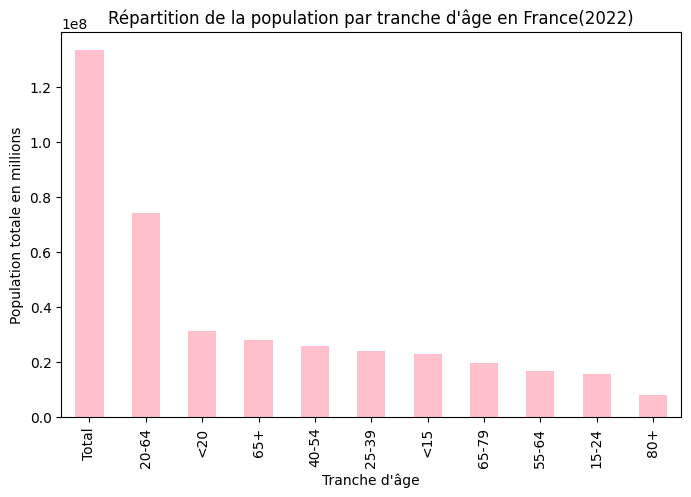

In [ ]:
pop_age_total = pop.groupby('AGE')['NB_PERSONNES'].sum().sort_values(ascending=False) #pour chaque tranche d'âge on calcule le nombre total de personnes
pop_age_total.plot(kind='bar', figsize=(8,5), color='pink')
plt.ylabel("Population totale en millions")
plt.xlabel("Tranche d'âge")
plt.title("Répartition de la population par tranche d'âge en France(2022)")


Ce sont les départements qui nous intéressent, on représente donc maintenant **les tranches d'âge par département** avec un **histogramme empilé**.

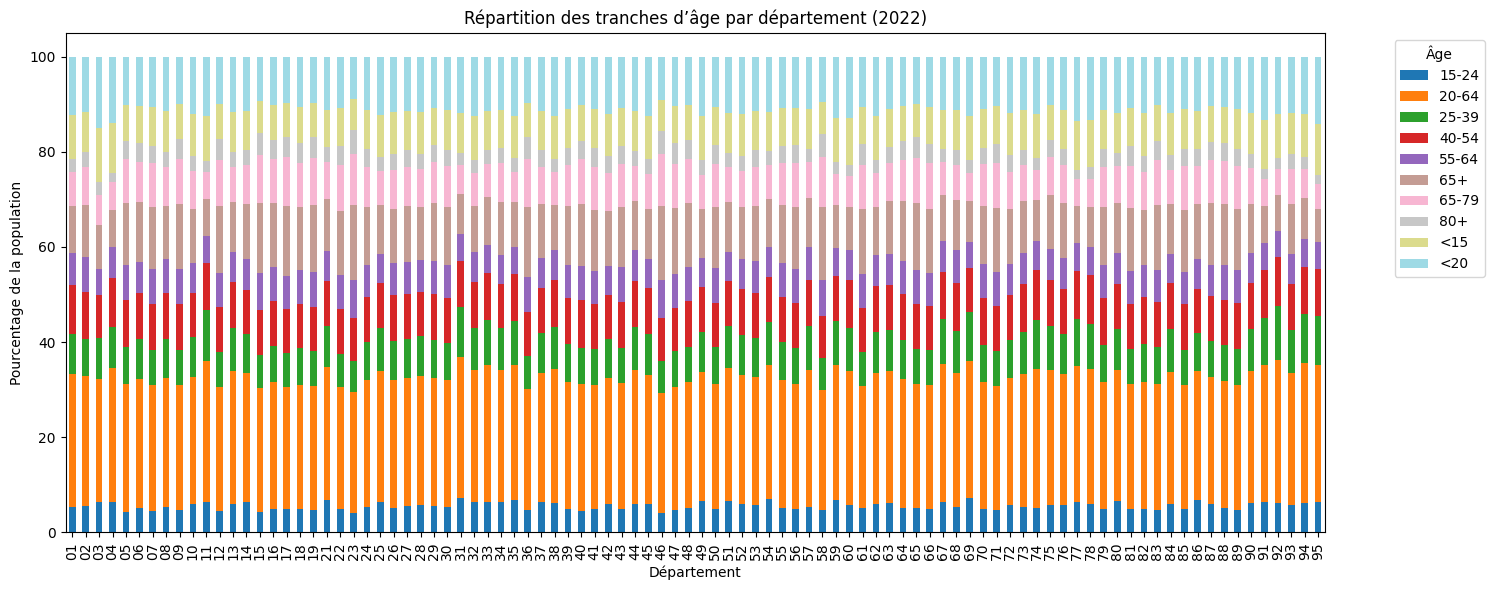

,DEP,AGE,NB_PERSONNES,POP_TOT,POURCENTAGE
0,01,15-24,114431.132239,2.109716e+06,5.424006
1,01,20-64,587293.854589,2.109716e+06,27.837579
2,01,25-39,177961.951238,2.109716e+06,8.435351
3,01,40-54,216652.117650,2.109716e+06,10.269255
4,01,55-64,144304.296828,2.109716e+06,6.839987


In [ ]:
pop_sans_total = pop[pop['AGE'] != 'Total']
#pour chaque département on calcule le nbre de personnes pour chaque tranche dage
pop_dep_age = pop_sans_total.groupby(['DEP', 'AGE'])['NB_PERSONNES'].sum().reset_index()

# on calcule maintenant la population totale pour chaque département toute tranche d'age confondue
pop_total_dep = pop_dep_age.groupby('DEP')['NB_PERSONNES'].sum().reset_index()
pop_total_dep = pop_total_dep.rename(columns={'NB_PERSONNES': 'POP_TOT'})

#on calcule le pourcentage de chaque tranche d'age pour un departement donc pop de la tranche d'age / pop totale du departement
pop_dep_age = pop_dep_age.merge(pop_total_dep, on='DEP')
pop_dep_age['POURCENTAGE'] = 100 * pop_dep_age['NB_PERSONNES'] / pop_dep_age['POP_TOT']

#Pivot pour histogramme empilé (pas le choix pour empilé il faut un pivot c'est le plus simple quoi)
pop_pivot = pop_dep_age.pivot(index='DEP', columns='AGE', values='POURCENTAGE')

#Histogramme empilé
pop_pivot.plot(kind='bar', stacked=True, figsize=(15,6), colormap='tab20')
plt.ylabel('Pourcentage de la population')
plt.xlabel('Département')
plt.title('Répartition des tranches d’âge par département (2022)')
plt.legend(title='Âge', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
pop_dep_age.head()


# **DATASET NIVEAU D'ÉDUCATION👩‍💻**
Le jeu de données relatif au niveau d'éducation est traité selon le même raisonnement que le jeu de données de densité de population.

On conserve uniquement :
- l'année 2022,
- les départements de la France métropolitaine,
- la population totale.



In [ ]:
#ON NETTOIE LE DATASET D'ÉDUCATION
#il ya que la tranche d'age 15ans et plus pour ce jeu de données
#on fait pareil que la densité de population
data_education = pd.read_csv(data_path_education, sep=";", dtype={'GEO': str}, low_memory=False)

education = data_education[
    (data_education['GEO_OBJECT'] == 'DEP') &
    (data_education['GEO'].isin(metropole)) &
    (data_education['TIME_PERIOD'] == 2022) &
    (data_education['SEX'] == '_T')
].reset_index(drop=True)

#on garde seulement ces 3 variables car c'est les seules utiles pour notre analyse
education = education[['GEO', 'EDUC', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'NB_PERSONNES','GEO':'DEP'})
#education.head(20)
education['EDUC'].unique() #permet de voir les noms des diplomes qui restent apres avoir trié le jeu de donnée (certains diplomes ne sont plus présent il faut par conséquent adapter le dictionnaire)
education_rename = {
    '_T': 'Total',
    '001T100_RP': 'Aucun diplôme / CEP',
    '200_RP': 'BEPC / DNB',
    '300_RP': 'CAP / BEP',
    '350T351_RP': 'Bac / Brevet pro',
    '500_RP': 'BTS / DUT / Bac+2',
    '600_RP': 'Licence / Bac+3-4',
    '700_RP': 'Master / Bac+5+'
}
education['EDUC'] = education['EDUC'].replace(education_rename)

education.head()


,DEP,EDUC,NB_PERSONNES
0,49,Bac / Brevet pro,106897.63254
1,86,BEPC / DNB,16718.54147
2,69,Licence / Bac+3-4,161372.59050
3,23,Bac / Brevet pro,17705.85090
4,27,Total,446711.77253


# **DATASET ÂGE MÉDIAN👩‍💻**
Pour le jeu de données relatif à l'âge médian, la procédure est similaire à celle appliquée aux 2 datasets précédents, à une différence près : ce jeu de données ne contient que des informations au niveau communal.

Les deux premiers caractères du code commune correspondent au département. Nous les extrayons donc afin de créer une variable départementale, ce qui nous permettra par la suite de fusionner ce jeu de données avec les autres datasets, qui contiennent toutes une colonne département.


In [ ]:
#ON NETTOIE LE DATASET AGE MEDIAN
age_median = pd.read_csv(data_path_agemedian, sep=";", dtype={'CODGEO': str}, low_memory=False)
age_median = age_median.rename(columns={'AGEPYR10': 'AGE_MEDIAN'}) #on change le nom de la variable car il était pas clair
age_median['DEP'] = age_median['CODGEO'].str[:2] #on extrait les 2 premiers caractères pour avoir le département car ya pas de colonne DEP dans ce jeu de donnees que des communes
age_median = age_median[age_median['DEP'].isin(metropole)]
age_median.head(10)

,NIVGEO,CODGEO,LIBGEO,SEXE,AGE_MEDIAN,NB,DEP
0,COM,01001,L'Abergement-Clémenciat,1,0,19.0,01
1,COM,01001,L'Abergement-Clémenciat,2,0,14.0,01
2,COM,01001,L'Abergement-Clémenciat,1,3,15.0,01
3,COM,01001,L'Abergement-Clémenciat,2,3,13.0,01
4,COM,01001,L'Abergement-Clémenciat,1,6,36.0,01
5,COM,01001,L'Abergement-Clémenciat,2,6,20.0,01
6,COM,01001,L'Abergement-Clémenciat,1,11,42.0,01
7,COM,01001,L'Abergement-Clémenciat,2,11,39.0,01
8,COM,01001,L'Abergement-Clémenciat,1,18,15.0,01
9,COM,01001,L'Abergement-Clémenciat,2,18,15.0,01


In [ ]:
#fonction pour calculer age median pondéré pour chaque département, on a ignoré la variable sexe car nos autres dataset on regarde sur la population totale pas sur les sexes séparés
#on donne plus de poids aux communes avec plus d’habitants (ça veut dire ça pondéré)
def age_median_pondere(x):
    return (x['AGE_MEDIAN'] * x['NB']).sum() / x['NB'].sum()

age_median_dep = age_median.groupby('DEP').apply(age_median_pondere).reset_index(name='AGE_MEDIAN')
age_median_dep.head(20)


/tmp/ipython-input-748106240.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,DEP,AGE_MEDIAN
0,01,35.388247
1,02,36.867088
2,03,41.105544
3,04,40.659141
4,05,40.231688
5,06,39.120217
6,07,39.837710
7,08,37.882053
8,09,40.737781
9,10,37.149301


Text(0.5, 1.0, 'Âge médian pondéré pour les 10 premiers départements')

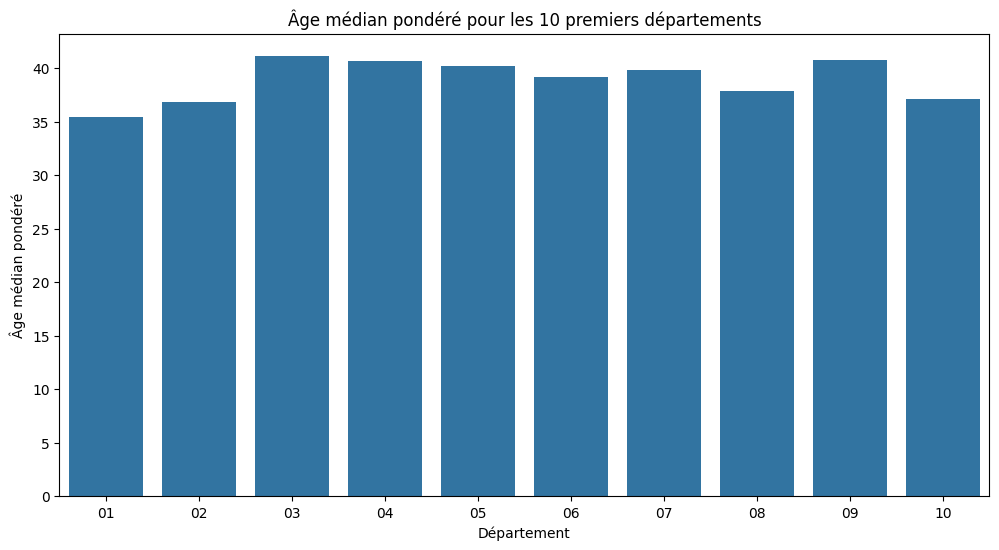

In [ ]:
#on representer pour 10 départements car si on fais tout les départements de la métropole ça sera illisible
dep10 = age_median_dep.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='DEP', y='AGE_MEDIAN', data=dep10)
plt.xlabel("Département")
plt.ylabel("Âge médian pondéré")
plt.title("Âge médian pondéré pour les 10 premiers départements")


# **DATASET REVENU👩‍💻**

In [ ]:
#ON NETTOIE LE DATASET REVENU
revenu_median=pd.read_csv(data_path_revenu,sep=";",low_memory=False)
revenu_median = revenu_median.rename(columns={'OBS_VALUE': 'valeur'})
revenu_median['DEP'] = revenu_median['GEO'].str[:2]
revenu = revenu_median[
    (revenu_median['TIME_PERIOD'] == 2021) &
    (revenu_median['DEP'].isin(metropole)) &
    (revenu_median['DEP'] == '01')
].reset_index(drop=True)


revenu = revenu[['DEP', 'valeur', 'FILOSOFI_MEASURE','UNIT_MEASURE']]
revenu['FILOSOFI_MEASURE'].unique()

#on renomme les variables pas claires
revenu_rename = {
    'MED_SL': 'Niveau de vie median',
    'PR_MD60': 'Taux de pauvreté',
    'IR_D9_D1_SL': 'Inégalités',
    'NUM_PER':'Nombre de personnes par commune',
}

revenu_mesurerename = {
    '_Z':'Nombre',
    'EUR_YR':'Euros par an',
    'PS':'Personnes',
    'PT':'Pourcentage',
}

revenu['FILOSOFI_MEASURE'] = revenu['FILOSOFI_MEASURE'].map(revenu_rename)
revenu['UNIT_MEASURE'] = revenu['UNIT_MEASURE'].map(revenu_mesurerename)

revenu.head(50)


,DEP,valeur,FILOSOFI_MEASURE,UNIT_MEASURE
0,01,NaN,NaN,Pourcentage
1,01,NaN,NaN,Pourcentage
2,01,NaN,NaN,Pourcentage
3,01,23300.0,Niveau de vie median,Euros par an
4,01,NaN,NaN,Pourcentage
5,01,NaN,Inégalités,Nombre
6,01,NaN,NaN,Pourcentage
7,01,60280.0,NaN,Euros par an
8,01,NaN,NaN,Pourcentage
9,01,NaN,NaN,Euros par an


### **Revenu_median_calcule**
c'est une approximation du revenu médian moyen d'un habitant au niveau départemental à partir des données communales.

In [ ]:
# 1. Chargement
revenu_median = pd.read_csv(data_path_revenu, sep=";", dtype={'GEO': str}, low_memory=False)
revenu_median = revenu_median.rename(columns={'OBS_VALUE': 'valeur'})

# 2. FILTRAGE COMMUNES
df_communes = revenu_median[
    (revenu_median['TIME_PERIOD'] == 2021) &
    (revenu_median['GEO'].str.len() == 5) &
    (~revenu_median['GEO'].str.contains('-')) &
    (~revenu_median['GEO'].str.startswith('00'))
].copy()

# 3. PIVOTAGE
df_final = df_communes.pivot_table(
    index='GEO',
    columns='FILOSOFI_MEASURE',
    values='valeur'
).reset_index()

# 4. RENOMMAGE
revenu_rename = {
    'MED_SL': 'Revenu_median',
    'PR_MD60': 'Taux_pauvrete',
    'IR_D9_D1_SL': 'Inegalites',
    'NUM_PER': 'Nombre_habitants'
}
df_final = df_final.rename(columns=revenu_rename)

# 5. CREATION DU DEPARTEMENT
df_final['DEP'] = df_final['GEO'].str[:2]


# Departement france métropolitaine
df_final = df_final[
    (df_final['DEP'].str.isnumeric()) &
    (df_final['DEP'].astype(str) <= '95') &
    (~df_final['DEP'].isin(['2A', '2B']))
].copy()

# Nettoyage des colonnes
colonnes_finales = ['GEO', 'DEP', 'Nombre_habitants', 'Revenu_median', 'Taux_pauvrete']
df_final = df_final[[c for c in colonnes_finales if c in df_final.columns]]

# Supprimer les lignes vides
df_final = df_final.dropna(subset=['Revenu_median', 'Nombre_habitants'], how='all')

# CALCUL DU REVENU MEDIAN PAR DEPARTEMENT
df_final['Revenu_median'] = pd.to_numeric(df_final['Revenu_median'])
df_final['Nombre_habitants'] = pd.to_numeric(df_final['Nombre_habitants'])
df_final['Masse_Revenu'] = df_final['Revenu_median'] * df_final['Nombre_habitants']

df_dep_calcule = df_final.groupby('DEP').agg({
    'Masse_Revenu': 'sum',
    'Nombre_habitants': 'sum'
}).reset_index()

df_dep_calcule['Revenu_median_calcule'] = df_dep_calcule['Masse_Revenu'] / df_dep_calcule['Nombre_habitants']
#df_dep_calcule['DEP'].unique() # le departement 20 n'existe plus depuis 1971 remplacé par 2A et 2B
print(f"Nombre de communes : {len(df_final)}") #Le nombre obtenu est logique car on a enlevé 34 965
print(df_dep_calcule[['DEP', 'Revenu_median_calcule']].head(30))

Nombre de communes : 31518
FILOSOFI_MEASURE DEP  Revenu_median_calcule
0                 01           25993.080953
1                 02           20623.235667
2                 03           21489.135265
3                 04           21887.229058
4                 05           22045.383897
5                 06           23513.914337
6                 07           21843.834916
7                 08           20661.037258
8                 09           20805.667563
9                 10           21144.199976
10                11           20421.850185
11                12           21847.887487
12                13           23152.492089
13                14           23196.899550
14                15           21741.272110
15                16           21852.338147
16                17           23049.422019
17                18           22049.750681
18                19           22169.455194
19                21           23630.857197
20                22           22813.680797
21   

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

# 1. URL du fichier GeoJSON des départements français
repo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

# 2. Création de la carte
fig = px.choropleth(
    df_dep_calcule,
    geojson=repo_url,
    locations='DEP',
    featureidkey="properties.code",  # La clé dans le GeoJSON qui correspond au numéro
    color='Revenu_median_calcule',    # La valeur qui définit la couleur
    color_continuous_scale="RdPu",    # Échelle de couleurs : du rouge au violet/rose
    range_color=(18000, 30000),
    scope="europe",                   # On centre sur l'Europe
    labels={'Revenu_median_calcule': 'Revenu Médian (€)', 'DEP': 'Département'},
    title='Carte des revenus médians par département (2021)'
)

# 3. Zoom sur la France et style
fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Euros/an")
)

# Affichage
fig.show()

# **DATASET COVID👩‍💻**

In [ ]:
covid = pd.read_csv(data_path,sep=";",low_memory=False)
covid.head(50)

,dep,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
0,01,2020-12-27,0,0,0,0,0,0,0.0,0.0,0.0
1,01,2020-12-28,0,0,0,0,0,0,0.0,0.0,0.0
2,01,2020-12-29,0,0,0,0,0,0,0.0,0.0,0.0
3,01,2020-12-30,0,0,0,0,0,0,0.0,0.0,0.0
4,01,2020-12-31,0,0,0,0,0,0,0.0,0.0,0.0
5,01,2021-01-01,0,0,0,0,0,0,0.0,0.0,0.0
6,01,2021-01-02,0,0,0,0,0,0,0.0,0.0,0.0
7,01,2021-01-03,0,0,0,0,0,0,0.0,0.0,0.0
8,01,2021-01-04,0,0,0,0,0,0,0.0,0.0,0.0
9,01,2021-01-05,11,2,0,11,2,0,0.0,0.0,0.0


# **Limite du dataset covid:📊**
Le **taux de vaccination complet** est déjà agrégé au niveau départemental, donc il reflète tous les habitants, tous niveaux d'éducation confondus.
Il n'existe pas de sous-taux par niveau d'éducation.
Il nous est donc impossible de connaitre les taux de vaccinations par niveaux d'éducations pour un même département à moins d'inventer des valeurs (chose qu'on ne peux pas faire)

In [ ]:
# Chargement des données
covid = pd.read_csv(data_path, sep=";", dtype=str, low_memory=False)

# Filtrage de la situation finale de l'année 2021
# On cherche précisément le dernier jour de l'année
covid = covid[covid['jour'] == '2021-12-31'].copy()

# Renommage des colonnes stratégiques
covid_rename = {
    'dep': 'DEP',
    'n_cum_complet': 'Nb_vaccines_complet',
    'n_cum_rappel': 'Nb_vaccines_rappel',
    'couv_complet': 'Taux_vaccination_complet',
    'couv_rappel': 'Taux_vaccination_rappel'
}
covid = covid.rename(columns=covid_rename)

# frnace metropolitaine
covid['DEP'] = covid['DEP'].str.zfill(2)
codes_exclure = ['2A', '2B', '971', '972', '973', '974','976', '977', '978']
covid = covid[~covid['DEP'].isin(codes_exclure)].copy()

# 7. Sélection finale des colonnes pour la fusion
covid = covid[['DEP', 'Nb_vaccines_complet','Nb_vaccines_rappel', 'Taux_vaccination_complet', 'Taux_vaccination_rappel']]

covid = covid.reset_index(drop=True)

covid.head(20)

,DEP,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel
0,01,472217,218774,85.0,39.4
1,02,403486,189277,89.8,42.1
2,03,263638,139271,89.9,47.5
3,04,113395,55258,78.1,38.0
4,05,104684,52182,84.5,42.1
5,06,815040,424203,86.3,44.9
6,07,241204,122999,84.3,43.0
7,08,206083,104818,89.4,45.5
8,09,109149,53500,81.0,39.7
9,10,229545,118316,86.1,44.4


In [ ]:
import plotly.express as px

# CONVERSION NUMÉRIQUE
# On remplace la virgule par un point et on convertit en nombre
covid['Taux_vaccination_complet'] = pd.to_numeric(covid['Taux_vaccination_complet'].str.replace(',', '.'), errors='coerce')

# 2. LIEN VERS LE FOND DE CARTE
repo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

# 3. CRÉATION DE LA CARTE
fig = px.choropleth(
    covid,
    geojson=repo_url,
    locations='DEP',
    featureidkey="properties.code",
    color='Taux_vaccination_complet',
    color_continuous_scale="Blues",
    # On ajuste l'échelle sur les valeurs réelles pour maximiser le contraste
    range_color=(covid['Taux_vaccination_complet'].min(), covid['Taux_vaccination_complet'].max()),
    scope="europe",
    labels={'Taux_vaccination_complet': 'Taux (%)', 'DEP': 'Département'},
    title='Taux de vaccination par département (Fin 2021)'
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)

# 5. MISE EN PAGE
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="%")
)

fig.show()


In [ ]:
#on observe que les département de l'ouest ont un taux de vaccination plus élevée

In [ ]:
dfs = {
    "df_dep_calcule": df_dep_calcule,
    "covid": covid,
    "education": education,
    "pop_dep_age": pop_dep_age,
    "age_median_dep": age_median_dep
}

for name, df in dfs.items():
    if 'DEP' not in df.columns:
        print(f"❌ Erreur : 'DEP' est absent de {name}. Colonnes dispo : {df.columns.tolist()}")
    else:
        print(f"✅ {name} est prêt.")

✅ df_dep_calcule est prêt.
✅ covid est prêt.
✅ education est prêt.
✅ pop_dep_age est prêt.
✅ age_median_dep est prêt.


À défaut de ne pas pouvoir extraire les taux de vaccinations par niveaux d'éducations pour chaque département, on a représenté un tableau avec les taux de vaccinations pour chaque niveau d'éducation **TOUT DÉPARTEMENTS CONFONDUS**
# **Remarque**
On observe qu'on ne peut rien conclure, les taux de vaccinations complètes sont assez homogènes au niveau national

In [ ]:
# Fusion de tous les DataFrames par 'DEP'
df_total = df_dep_calcule.merge(covid, on='DEP').merge(education, on='DEP').merge(pop_dep_age, on='DEP').merge(age_median_dep, on='DEP')
#df_total['EDUC'].unique()
# Taux moyen pondéré par niveau d'éducation
df_edu_grouped = df_total.groupby('EDUC').apply(
   lambda x: (x['Taux_vaccination_complet'] * x['NB_PERSONNES_x']).sum() / x['NB_PERSONNES_x'].sum()
).reset_index(name='Taux_vaccination_moyen')
df_edu_grouped.head(10)

/tmp/ipython-input-1557307761.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,EDUC,Taux_vaccination_moyen
0,Aucun diplôme / CEP,88.256116
1,BEPC / DNB,88.396773
2,BTS / DUT / Bac+2,88.447214
3,Bac / Brevet pro,88.383099
4,CAP / BEP,88.607488
5,Licence / Bac+3-4,88.364307
6,Master / Bac+5+,88.402732
7,Total,88.420587


/tmp/ipython-input-2234691171.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




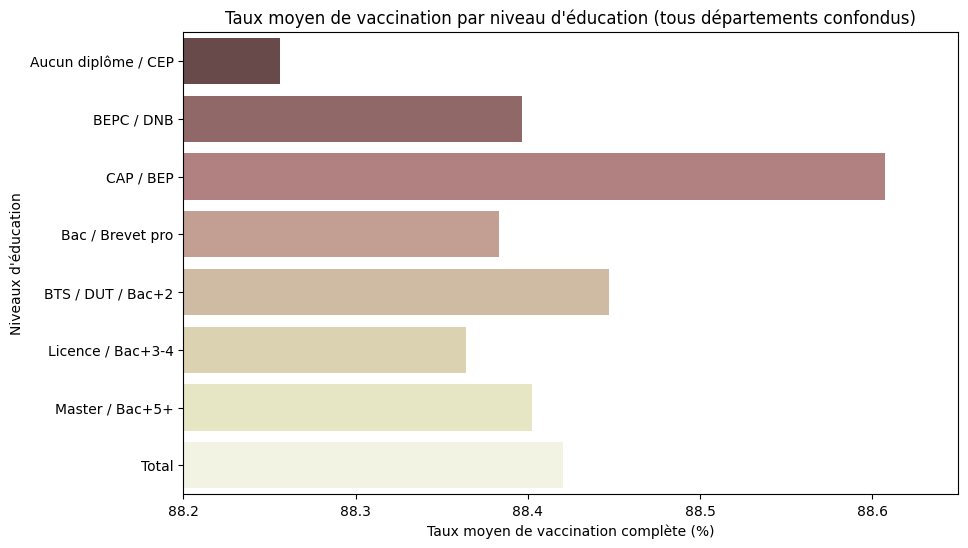

In [ ]:
# Définir l'ordre des niveaux d'éducation
ordre_edu = [
    'Aucun diplôme / CEP',
    'BEPC / DNB',
    'CAP / BEP',
    'Bac / Brevet pro',
    'BTS / DUT / Bac+2',
    'Licence / Bac+3-4',
    'Master / Bac+5+',
    'Total'
]

# on affiche le barplot en partant du bas niveau d'éducation au plus haut niveau d'éducation
df_edu_grouped['EDUC'] = pd.Categorical(df_edu_grouped['EDUC'], categories=ordre_edu, ordered=True)

# Affichage
plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x='Taux_vaccination_moyen',
    y='EDUC',
    data=df_edu_grouped,
    palette='pink',
    order=ordre_edu
)

plt.xlabel('Taux moyen de vaccination complète (%)')
plt.ylabel('Niveaux d\'éducation')
plt.title('Taux moyen de vaccination par niveau d\'éducation (tous départements confondus)')
plt.xlim(88.2, 88.65)  # ajuste l'échelle pour mieux voir les différences

plt.show()



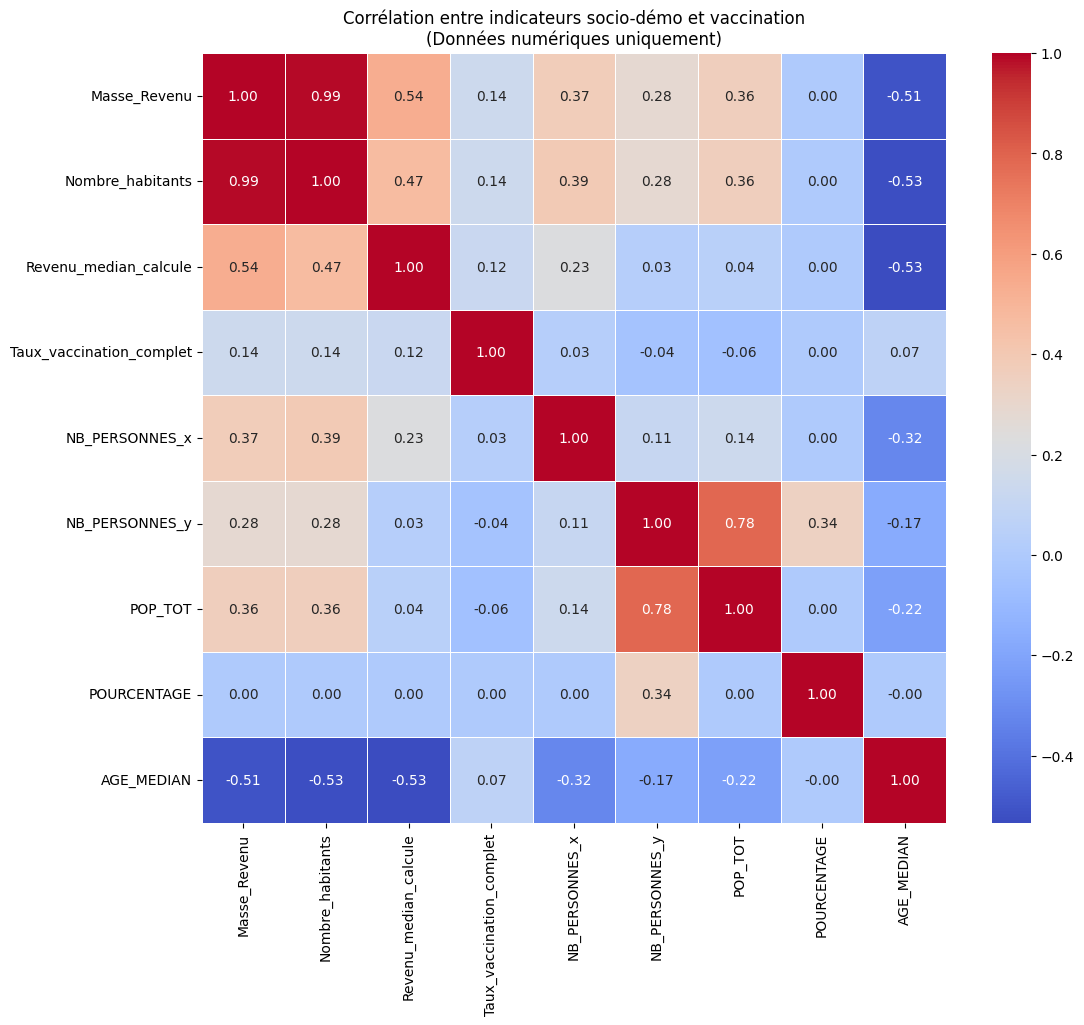

In [ ]:
# 1. On sélectionne uniquement les colonnes qui contiennent des nombres
# Cela exclut 'DEP', les noms de diplômes, etc.
df_numeric = df_total.select_dtypes(include=['number'])

# 2. On vérifie s'il reste des colonnes (si df_numeric est vide, c'est que tout est lu comme du texte)
if df_numeric.empty:
    print("Erreur : Aucune donnée numérique trouvée. Vérifiez vos conversions pd.to_numeric.")
else:
    plt.figure(figsize=(12, 10))

    # 3. On calcule la corrélation uniquement sur le numérique
    correlations = df_numeric.corr()

    # 4. Affichage de la Heatmap
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    plt.title("Corrélation entre indicateurs socio-démo et vaccination\n(Données numériques uniquement)")
    plt.show()

In [ ]:
#on remplace les noms des diplomes par des valeurs numerique pour le scatterplot
education_scatterplot = {
    'Aucun diplôme / CEP': 0,
    'BEPC / DNB': 1,
    'CAP / BEP': 2,
    'Bac / Brevet pro': 3,
    'BTS / DUT / Bac+2': 4,
    'Licence / Bac+3-4': 5,
    'Master / Bac+5+': 6
}

# Création d'une nouvelle colonne numérique
df_total['NIVEAU_EDUCATION'] = df_total['EDUC'].map(education_scatterplot)

df_total.head()


,DEP,Masse_Revenu,Nombre_habitants,Revenu_median_calcule,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel,EDUC,NB_PERSONNES_x,AGE,NB_PERSONNES_y,POP_TOT,POURCENTAGE,AGE_MEDIAN,NIVEAU_EDUCATION
0,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,15-24,114431.132239,2.109716e+06,5.424006,35.388247,1.0
1,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,20-64,587293.854589,2.109716e+06,27.837579,35.388247,1.0
2,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,25-39,177961.951238,2.109716e+06,8.435351,35.388247,1.0
3,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,40-54,216652.117650,2.109716e+06,10.269255,35.388247,1.0
4,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,55-64,144304.296828,2.109716e+06,6.839987,35.388247,1.0


#**Scatterplot : Revenu 💶 vs Vaccination 💉**
*   La droite de régression est légérement ascendante
*   Chaque point = un département


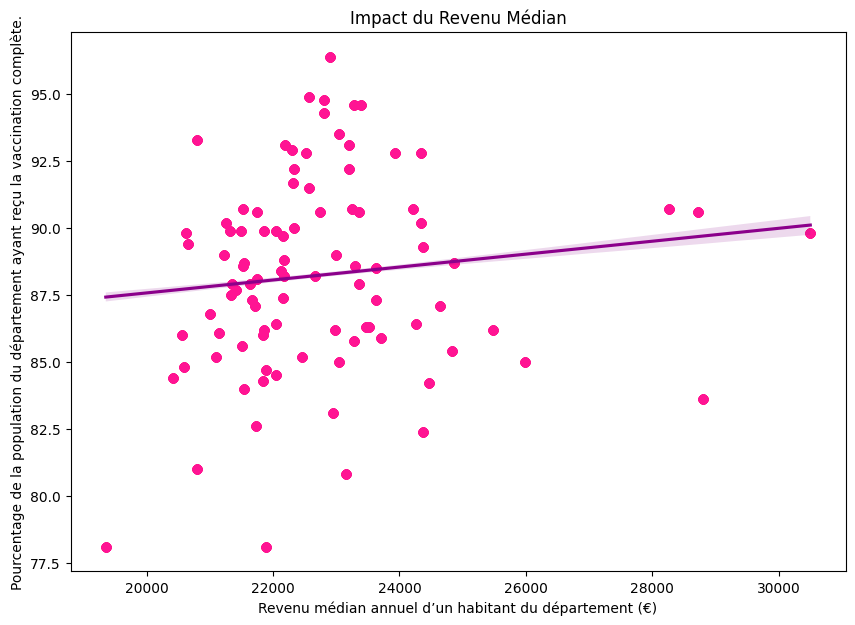

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(data=df_total, x='Revenu_median_calcule', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'deeppink'}, line_kws={'color':'darkmagenta'})
plt.title('Impact du Revenu Médian')
plt.xlabel('Revenu médian annuel d’un habitant du département (€)')
plt.ylabel('Pourcentage de la population du département ayant reçu la vaccination complète.')
plt.show()


#**Scatterplot : Éducation 📚 vs Vaccination 💉**
Ici il ya un problème :

Même si on a un seul taux de vaccination pour chaque département on ne peux pas mettre dans notre jeu de donnée le meme taux pour chaque ligne ou il ya le nombre de personnes qui ont un certains niveau dun meme département le taux il faut le pondérer il faut qu'il soit plus élevée si par exemple il ya plus de personne pour un meme niveau meme si c le meme departement

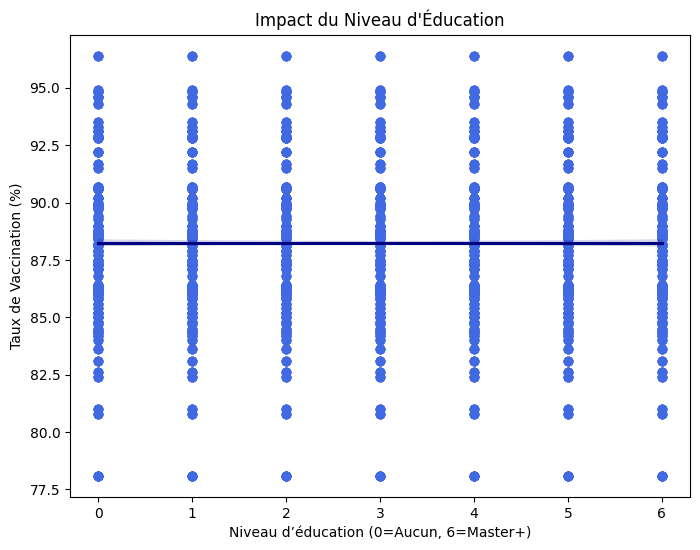

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_total, x='NIVEAU_EDUCATION', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'royalblue'}, line_kws={'color':'navy'})
plt.title("Impact du Niveau d'Éducation")
plt.xlabel('Niveau d’éducation (0=Aucun, 6=Master+)')
plt.ylabel('Taux de Vaccination (%)')
plt.show()


#**Scatterplot : Âge 📆 vs Vaccination 💉**

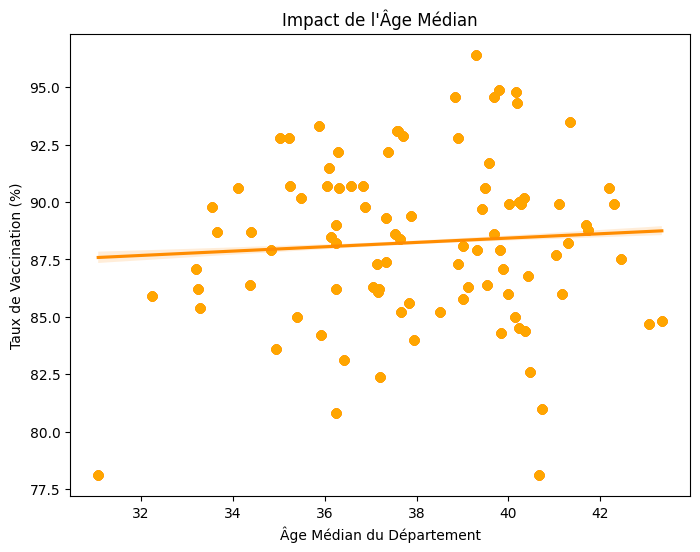

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_total, x='AGE_MEDIAN', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'orange'}, line_kws={'color':'darkorange'})
plt.title("Impact de l'Âge Médian")
plt.xlabel('Âge Médian du Département')
plt.ylabel('Taux de Vaccination (%)')
plt.show()
